In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


pip install association_metrics

In [ ]:
pip install association_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3954 sha256=b90f40f97e448336052050ace312360fa926754b8d8b1bf20c7815f73b483be1
  Stored in directory: /root/.cache/pip/wheels/2d/1e/07/287b993a07cc41eade32a9b863d6d4686f985d72344a9e0911
Successfully built association-metrics


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import association_metrics as am

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Mock_Project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [ ]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [ ]:
df.shape

(1200, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

We notice that there aren't any null values present in any of the columns. 

There are 9 columns of type 'object' and 19 columns of type 'int'.

In [ ]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


#####Employement number has no effect on the performance rating or the attrition. Thus dropping it from the table.

In [ ]:
df = df.drop(['EmpNumber'], axis = 1)

######Finding the value counts of the performance rating and the attrition.

In [ ]:
df['PerformanceRating'].value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [ ]:
df['Attrition'].value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [ ]:
df['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [ ]:
df['EmpJobRole'].unique()

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

##Correlation plot and heatmap of numerical featues.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap= 'YlGnBu')

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


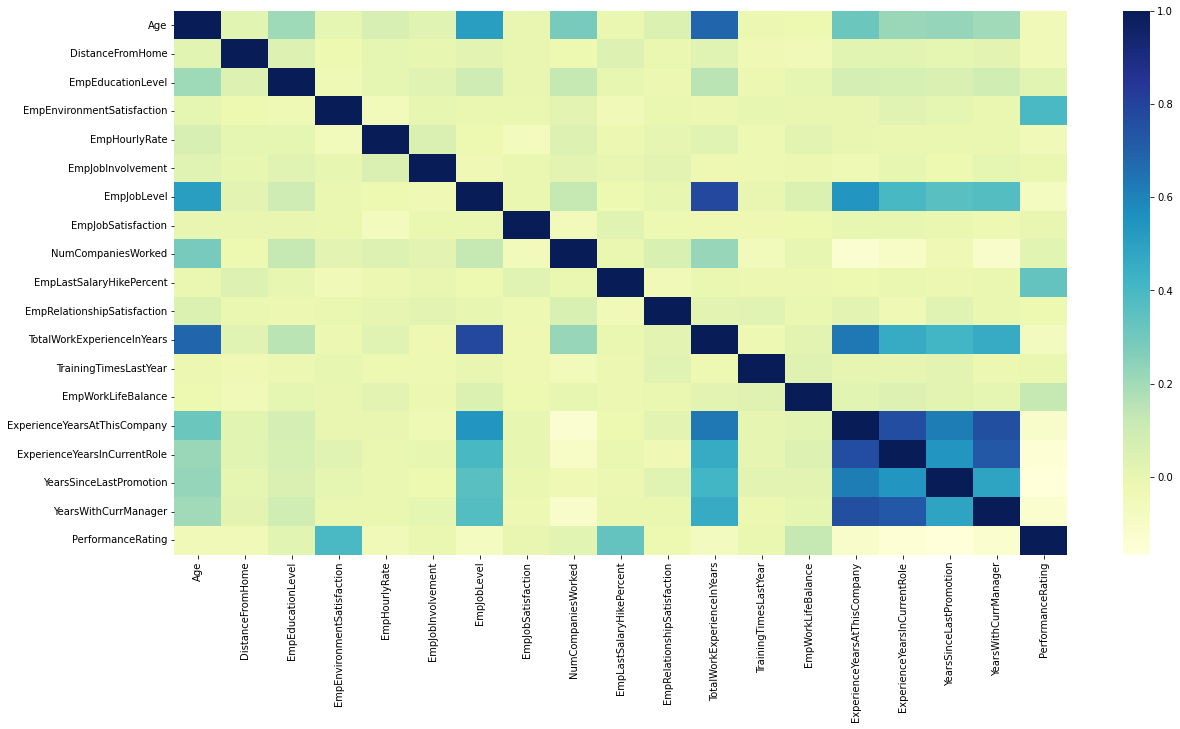

In [ ]:
plt.figure(figsize= (20, 10))
sns.heatmap(corr, cmap="YlGnBu")

From the above heatmap we notice that,
- age is slightly correlated with the education level of the employee.
- most of the promotions work on basis of number of years of experience which would most probable be greater for employees with high age, thus making the job level dependent on the age, number of years of experience.
- there are slight chances that under long years a people tend to change companies, thus increasing the probability of having worked in more comapanies.
- the persons who are at a higher job level will in general have more years of experience. 
- ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsWithCurrManager are slightly dependent on the number of companies the person worked.
- that the parameters ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager are all interdependent and also performance rating
- a person who is more satisfied with the environment they are working show a better performance.
- a person who is performs well is in general the one who gaines a hike.
- DistanceFromHome, EmpHourlyRate, EmpJobInvolvement, EmpJobSatisfaction, EmpRelationshipSatisfaction, TrainingTimesLastYear, EmpWorkLifeBalance are not much dependent on any of the other features.

##CrammersV
It measures how strongly two categorical fields are associated with each other.

In [ ]:
cat_var = df.select_dtypes(include=['object']).copy()
cat_var.head()

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No


In [ ]:
for i in cat_var.columns:
    cat_var[i] = cat_var[i].astype('category')
cramersV = am.CramersV(cat_var)
crammersV_corr = cramersV.fit()
crammersV_corr.style.background_gradient(cmap= 'crest')

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
Gender,1.000000,0.051094,0.042194,0.054859,0.160838,0.055999,0.038410,0.035758
EducationBackground,0.051094,1.000000,0.055007,0.366388,0.354192,0.046986,0.042803,0.120830
MaritalStatus,0.042194,0.055007,1.000000,0.075640,0.120965,0.063844,0.027122,0.186417
EmpDepartment,0.054859,0.366388,0.075640,1.000000,0.981091,0.063538,0.069582,0.087156
EmpJobRole,0.160838,0.354192,0.120965,0.981091,1.000000,0.119293,0.140877,0.204155
BusinessTravelFrequency,0.055999,0.046986,0.063844,0.063538,0.119293,1.000000,0.063484,0.130237
OverTime,0.038410,0.042803,0.027122,0.069582,0.140877,0.063484,1.000000,0.224535
Attrition,0.035758,0.120830,0.186417,0.087156,0.204155,0.130237,0.224535,1.000000


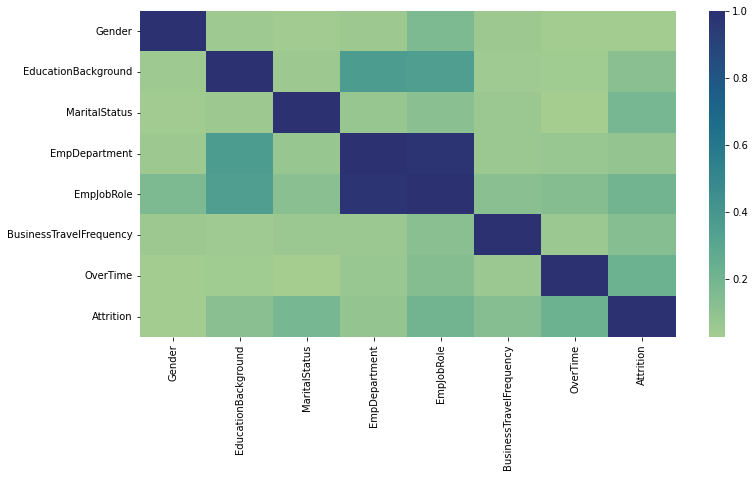

In [ ]:
plt.figure(figsize= (12, 6))
sns.heatmap(crammersV_corr, cmap="crest")

From the above heatmap we notice that,


*  Educational backgrond influences the department and role in which a person works. 
*   Job role is highly corellated to the department they work. Most of the jobs are department specific.

*   Attrition depends on the job role and the amount of overtime a person does. It is also slightly dependent on marital status, business travel frequency and educational background.





##Anova

In [ ]:
num_var = []
for i in df.columns:
    if i not in cat_var:
        num_var.append(i)

In [ ]:
for i in num_var:
    yes = df[df['Attrition']=='Yes'][i]
    no = df[df['Attrition']=='No'][i]
    F, p = ss.f_oneway(yes, no)
    print("{: <30} {: .4f}".format(i, p))

Age                             0.0000
DistanceFromHome                0.0285
EmpEducationLevel               0.0890
EmpEnvironmentSatisfaction      0.0000
EmpHourlyRate                   0.3624
EmpJobInvolvement               0.0000
EmpJobLevel                     0.0000
EmpJobSatisfaction              0.0046
NumCompaniesWorked              0.1925
EmpLastSalaryHikePercent        0.7437
EmpRelationshipSatisfaction     0.1981
TotalWorkExperienceInYears      0.0000
TrainingTimesLastYear           0.2251
EmpWorkLifeBalance              0.0174
ExperienceYearsAtThisCompany    0.0000
ExperienceYearsInCurrentRole    0.0000
YearsSinceLastPromotion         0.0476
YearsWithCurrManager            0.0000
PerformanceRating               0.1683


Age, DistanceFromHome, EmpEnvironmentSatisfaction, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, TotalWorkExperienceInYears, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager have p value less than 0.05.

In [ ]:
for i in cat_var:
  CategoryGroupLists=df.groupby(i)['PerformanceRating'].apply(list)
  f, p = ss.f_oneway(*CategoryGroupLists)
  print("{: <30} {: .4f}".format(i, p))

Gender                          0.9509
EducationBackground             0.4088
MaritalStatus                   0.1457
EmpDepartment                   0.0000
EmpJobRole                      0.0001
BusinessTravelFrequency         0.5250
OverTime                        0.0821
Attrition                       0.1683


EmpDepartment, EmpJobRole have p value less than 0.05.

##EDA for Attiration

In [ ]:
def barPerc(df,xVar,ax):
    numX=len([x for x in df[xVar].unique() if x==x])
    bars = ax.patches
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total = sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,bar.get_height(),f'{bar.get_height()/total:.0%}',ha="center",va="bottom")

####Age

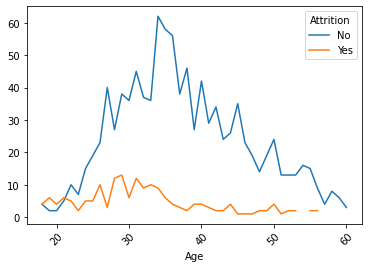

In [ ]:
arr_age = df.groupby(['Age', 'Attrition']).size()
arr_age.unstack().plot()
plt.xticks(rotation=45)
plt.show()

It is noted that people below the age 21 are mostly leaving rather than staying. The number persons leaving is maximum from the mid 20s to mid 30s.

####Gender

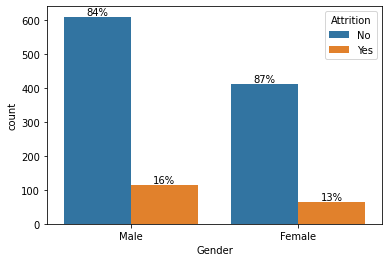

In [ ]:
ax = sns.countplot(x="Gender", hue="Attrition", data=df)
barPerc(df,'Gender',ax)

We notice that the percentage of men leaving the company is slightly greater than that of the women.

####Education background

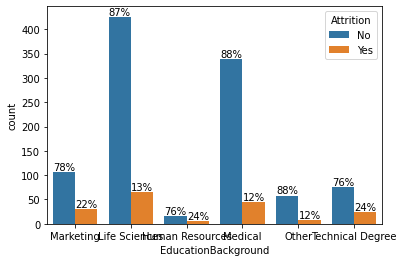

In [ ]:
ax = sns.countplot(x="EducationBackground", hue="Attrition", data=df)
barPerc(df,'EducationBackground',ax)

Highest number of people leaving the company is from Life sciences but Highest percentage of people leaving the company are from Human Resources and Tech degree.

####Marital satus

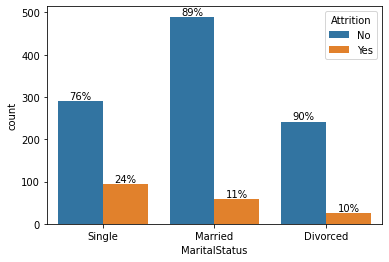

In [ ]:
ax = sns.countplot(x="MaritalStatus", hue="Attrition", data=df)
barPerc(df,'MaritalStatus',ax)

As we have observed earlier people with less age who are assumed to be single are leaving the company most.

####Employee depatment

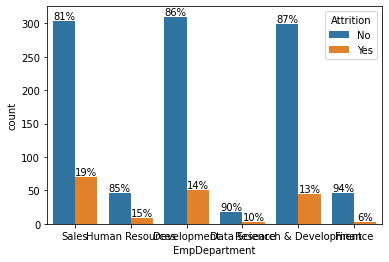

In [ ]:
ax = sns.countplot(x="EmpDepartment", hue="Attrition", data=df)
barPerc(df,'EmpDepartment',ax)

Employees from sales department are attiranting the most than other departments

####Employee job role

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


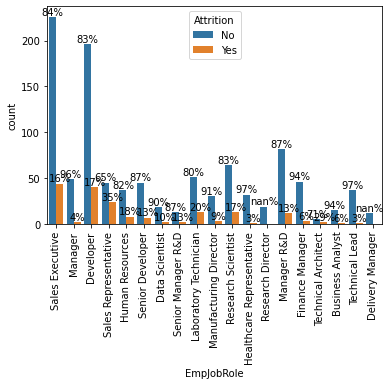

In [ ]:
ax = sns.countplot(x="EmpJobRole", hue="Attrition", data=df)
plt.xticks(rotation= 90)
barPerc(df,'EmpJobRole',ax)

Sales Executives, Developers and Senior managers R&D have high attirating rates.

Research directors and Delivery managers has 0 attiration rate

####Business Travel Frequency

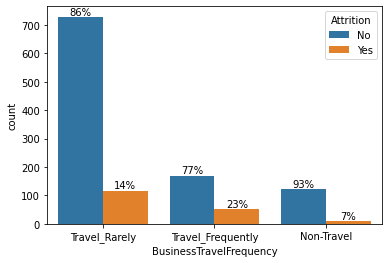

In [ ]:
ax = sns.countplot(x="BusinessTravelFrequency", hue="Attrition", data=df)
barPerc(df,'BusinessTravelFrequency',ax)

Employees who travel more frequently tend to leave the company the most.

####Overtime



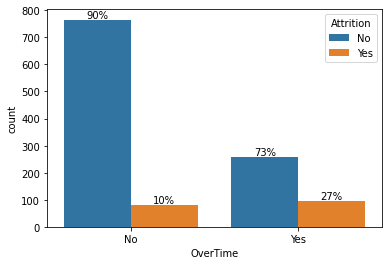

In [ ]:
ax = sns.countplot(x="OverTime", hue="Attrition", data=df)
barPerc(df,'OverTime',ax)

Employees who does Overtime more are attirating the most

##EDA of Performance rating

####Age

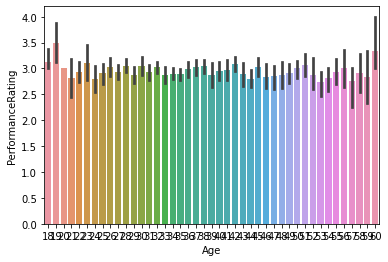

In [ ]:
  ax = sns.barplot(x="Age", y="PerformanceRating", data=df)

No trend observed

####EmpEducationLevel

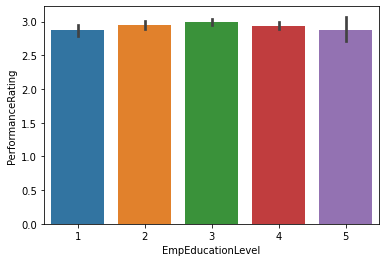

In [ ]:
ax = sns.barplot(x="EmpEducationLevel", y="PerformanceRating", data=df)

No trend observed

####EmpEnvironmentSatisfaction

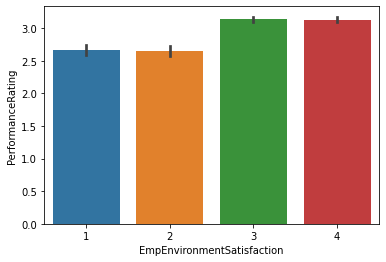

In [ ]:
ax = sns.barplot(x="EmpEnvironmentSatisfaction", y="PerformanceRating", data=df)

Employees with better environment satisfaction are slightly observed to have better performance rating.

####EmpJobSatisfaction

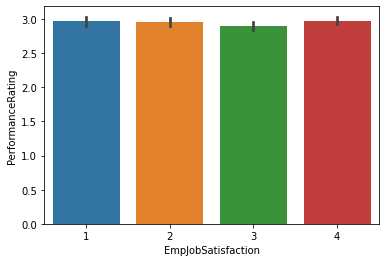

In [ ]:
ax = sns.barplot(x="EmpJobSatisfaction", y="PerformanceRating", data=df)

No trend observed

####NumCompaniesWorked

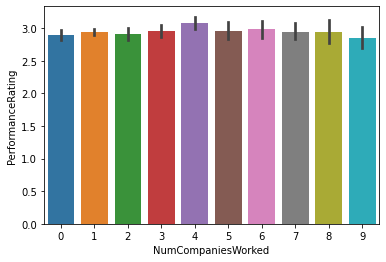

In [ ]:
ax = sns.barplot(x="NumCompaniesWorked", y="PerformanceRating", data=df)

No trend observed

####EmpLastSalaryHikePercent

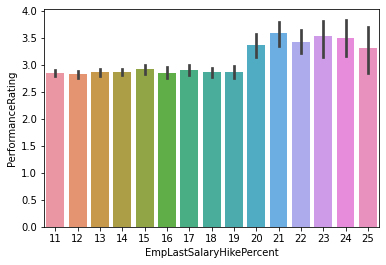

In [ ]:
ax = sns.barplot(x="EmpLastSalaryHikePercent", y="PerformanceRating", data=df)

Employees with high salary hike percent are slightly having better performance rating.

####EmpWorkLifeBalance

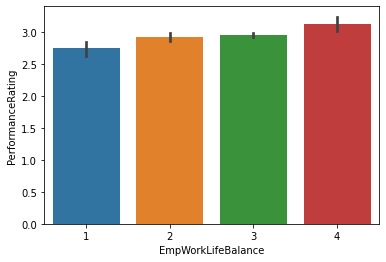

In [ ]:
ax = sns.barplot(x="EmpWorkLifeBalance", y="PerformanceRating", data=df)

People with better work life balance are having slightly better performance rating

#Modelling

In [ ]:
model_var = ['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EmpDepartment', 'EmpJobRole', 'PerformanceRating']
model_num_var = ['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 
             'YearsSinceLastPromotion', 'YearsWithCurrManager']
model_cat_var = ['EmpDepartment', 'EmpJobRole']

In [ ]:
df = df[model_var]
X = df.drop(columns=['PerformanceRating'],axis=1)
Y = df['PerformanceRating']

In [ ]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [ ]:
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, model_num_var), ("cat", categorical_transformer, model_cat_var)], remainder='passthrough')
clf = Pipeline(steps=[("preprocessor", preprocessor)])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                    test_size=0.25, random_state=0)
clf.fit(X_train, Y_train)

X_train = clf.transform(X_train)
Y_train = np.array(Y_train).reshape(-1,1)

X_test = clf.transform(X_test)
Y_test = np.array(Y_test).reshape(-1,1)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(900, 32) (300, 32) (900, 1) (300, 1)


##Logistic Regression

In [ ]:
logm= LogisticRegression(random_state= 0)
logm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
predictions = logm.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,predictions))

0.8266666666666667


In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           2       0.71      0.57      0.63        42
           3       0.87      0.91      0.89       223
           4       0.64      0.60      0.62        35

    accuracy                           0.83       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.82      0.83      0.82       300



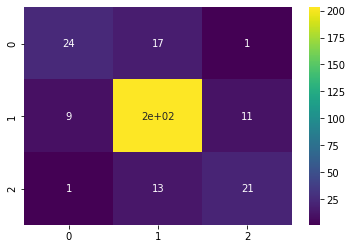

In [ ]:
sns.heatmap(confusion_matrix(Y_test,predictions),cmap='viridis',annot=True)
plt.show()

##Support Vector Machine

In [ ]:
rbf_svc = SVC(kernel='rbf', C=100, random_state=10, probability=True).fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_predict_svm = rbf_svc.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,y_predict_svm))
print(classification_report(Y_test,y_predict_svm))

0.8433333333333334
              precision    recall  f1-score   support

           2       0.73      0.71      0.72        42
           3       0.90      0.89      0.90       223
           4       0.62      0.69      0.65        35

    accuracy                           0.84       300
   macro avg       0.75      0.76      0.76       300
weighted avg       0.85      0.84      0.84       300



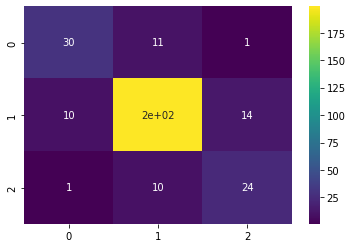

In [ ]:
sns.heatmap(confusion_matrix(Y_test,y_predict_svm),cmap='viridis',annot=True)
plt.show()

##Decision Tree

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tr=DecisionTreeClassifier()

In [ ]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
predict_tree=tree.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,predict_tree))

0.91


In [ ]:
print(classification_report(Y_test,predict_tree))

              precision    recall  f1-score   support

           2       0.84      0.86      0.85        42
           3       0.95      0.93      0.94       223
           4       0.78      0.83      0.81        35

    accuracy                           0.91       300
   macro avg       0.86      0.87      0.86       300
weighted avg       0.91      0.91      0.91       300



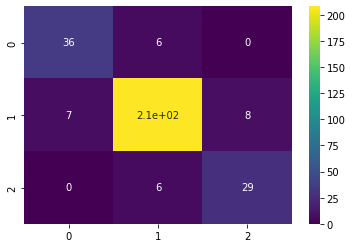

In [ ]:
sns.heatmap(confusion_matrix(Y_test,predict_tree),cmap='viridis',annot=True)
plt.show()

##Random Forest

In [ ]:
rfc = RandomForestClassifier(max_depth= 9, n_estimators= 800)

In [ ]:
rfc.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=9, n_estimators=800)

In [ ]:
rf_predictions = rfc.predict(X_test)

In [ ]:
accuracy_score(Y_test, rf_predictions)

0.9466666666666667

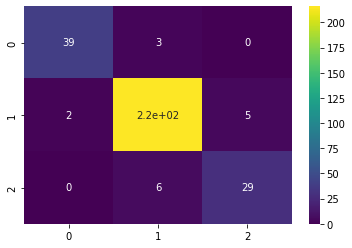

In [ ]:
sns.heatmap(confusion_matrix(Y_test,rf_predictions),cmap='viridis',annot=True)
plt.show()

In [ ]:
print(classification_report(Y_test,rf_predictions))

              precision    recall  f1-score   support

           2       0.95      0.93      0.94        42
           3       0.96      0.97      0.96       223
           4       0.85      0.83      0.84        35

    accuracy                           0.95       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.95      0.95      0.95       300



##Gradient Booster

In [ ]:
gb = GradientBoostingClassifier(n_estimators= 500, random_state= 0)
gb.fit(X_train, Y_train)
gb_predictions = gb.predict(X_test)
print("Predictions have finished")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predictions have finished


In [ ]:
accuracy_score(Y_test, gb_predictions)

0.92

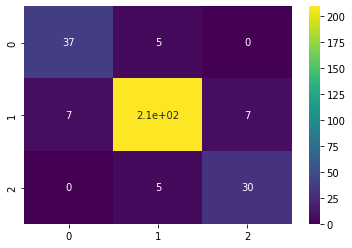

In [ ]:
sns.heatmap(confusion_matrix(Y_test,gb_predictions),cmap='viridis',annot=True)
plt.show()

In [ ]:
print(classification_report(Y_test,gb_predictions))

              precision    recall  f1-score   support

           2       0.84      0.88      0.86        42
           3       0.95      0.94      0.95       223
           4       0.81      0.86      0.83        35

    accuracy                           0.92       300
   macro avg       0.87      0.89      0.88       300
weighted avg       0.92      0.92      0.92       300

